In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, r2_score

In [3]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

In [28]:
df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'date_y', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'date', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

## Simple linear regression: Player Profile and Market Value
### 1.Business question: How does the highest market value of a player impact their current market value?

Mean Squared Error: 10329629032769.518
R-squared: 0.7974076999430394


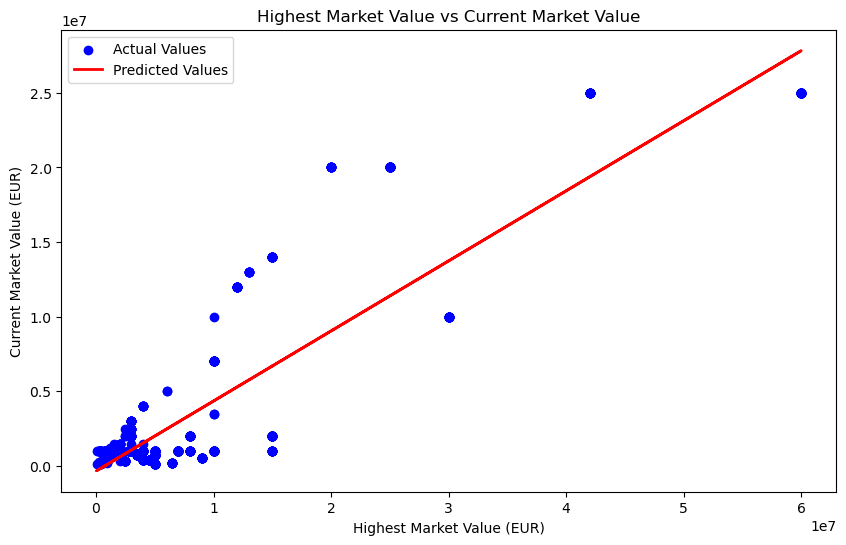

In [8]:
X = df[['highest_market_value_in_eur']]
y = df['market_value_in_eur']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Geting predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Values')
plt.title('Highest Market Value vs Current Market Value')  # Corrected title syntax
plt.xlabel('Highest Market Value (EUR)')
plt.ylabel('Current Market Value (EUR)')
plt.legend()
plt.show()

## Interpretation
#### R-squared (0.80): This value indicates that approximately 80% of the variance in the target variable (market value) can be explained by the model using the selected features (such as goals, assists, minutes played, and age). This is a relatively strong fit, suggesting that the model is doing a good job of capturing the relationship between the predictors and the market value.

#### Based on the visual representation, we can infer that there is a positive relationship between the "Highest Market Value" and the "Current Market Value". As the "Highest Market Value" increases, the "Current Market Value" tends to increase as well.

## Multiple linear regression: Player Profile and Market Value
### Business question: "How can we predict a player's market value by analyzing key performance metrics such as goals, assists, and minutes played, and which features should we prioritize to ensure an accurate prediction?"

In [5]:
if 'age' not in df.columns:
    df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
    df['age'] = (pd.to_datetime(df['date']) - df['date_of_birth']).dt.days // 365  # Calculate age

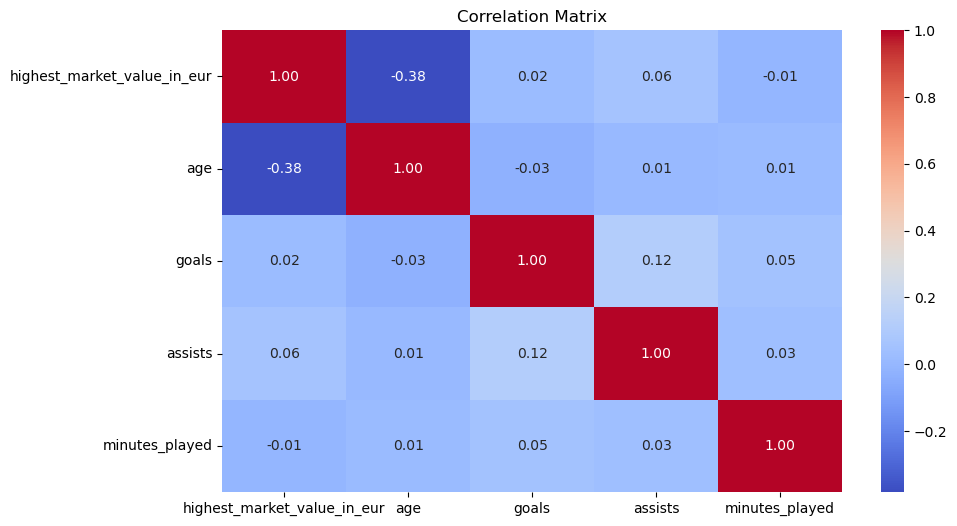

R-squared: 0.8443352084411382
Mean Squared Error: 7936923317492.042


In [10]:
# Calculating correlation matrix
correlation_matrix = df[['highest_market_value_in_eur', 'age', 'goals', 'assists', 'minutes_played']].corr()

# Ploting heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Removed features with high correlation (above 0.8)
# Based on the correlation matrix, manually drop features that are highly correlated.
X = df[['highest_market_value_in_eur', 'age', 'minutes_played']]  
y = df['market_value_in_eur']


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Model evaluation
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

### R-squared (0.8443) indicates that approximately 84.43% of the variance in the dependent variable (likely "Current Market Value") can be explained by the independent variables in the model. This suggests a good fit of the model to the data.